In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [39]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype=torch.long)

In [40]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        return x

In [41]:
model = XORModel()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [42]:
epochs = 10000
l=[]
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    outputs = torch.log_softmax(outputs, dim=1)
    loss = criterion(outputs, y)
    l.append(loss.item())
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/10000, Loss: 0.7218334078788757
Epoch 1001/10000, Loss: 0.6924200654029846
Epoch 2001/10000, Loss: 0.685016393661499
Epoch 3001/10000, Loss: 0.554216206073761
Epoch 4001/10000, Loss: 0.15500225126743317
Epoch 5001/10000, Loss: 0.049768127501010895
Epoch 6001/10000, Loss: 0.02724473364651203
Epoch 7001/10000, Loss: 0.018364951014518738
Epoch 8001/10000, Loss: 0.013732527382671833
Epoch 9001/10000, Loss: 0.010918249376118183


In [43]:
with torch.no_grad():
    test_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predictions = model(test_data)
    print(predictions)
    _, predicted_classes = torch.max(predictions, 1)
    print("\nPredictions after training:")
    for i in range(len(test_data)):
        print(f"Input: {test_data[i]}, Predicted Class: {predicted_classes[i]}")

tensor([[ 2.4376, -2.1206],
        [-2.7762,  2.0133],
        [-2.7764,  2.0134],
        [ 1.6742, -3.0138]])

Predictions after training:
Input: tensor([0., 0.]), Predicted Class: 0
Input: tensor([0., 1.]), Predicted Class: 1
Input: tensor([1., 0.]), Predicted Class: 1
Input: tensor([1., 1.]), Predicted Class: 0


Text(0, 0.5, 'Training loss')

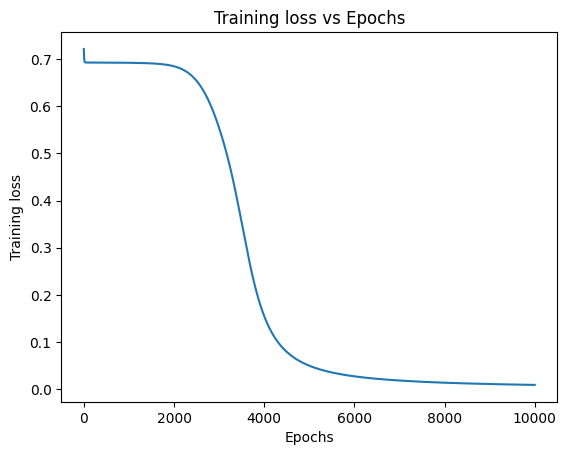

In [44]:
plt.plot([i for i in range(epochs)],l)
plt.title("Training loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training loss")